In [17]:
import pandas as pd
import numpy as np

In [18]:
fake=pd.read_csv("Fake.csv")
true=pd.read_csv("True.csv")

In [26]:
fake.head()

,title,text,subject,date,temp
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [21]:
fake["temp"]=1
true["temp"]=0

In [23]:
df=pd.concat([fake,true]).reset_index(drop=True)

In [24]:
print(df.shape)


(44898, 5)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   temp    44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [29]:
input_arr=np.array(df['title'])

In [30]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yadalaaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

for i in range(0, 40000):
    newArr = re.sub('[^a-zA-Z]', ' ', input_arr[i])
    #The sub() function replaces the matches with the text of your choice,
    #in this case "[a-zA-Z]" is getting replaced with blank space
    #input_arr[i] is the array of 'title' column.

    #[a-zA-Z]: Returns a match for any character alphabetically between a and z, lower case OR upper case

    newArr = newArr.lower()
    #Converting into lowercase

    newArr = newArr.split()
    #The split() method splits a string into a list.

    ps = PorterStemmer()
    newArr = [ps.stem(word) for word in newArr if not word in set(stopwords.words('english'))]
    #ps.stem(word) is stemming the words
    #the word will be considered if the word is not a stopword
    #set(stopwords.words('english')= checks any kind of stopwords in English language

    newArr = ' '.join(newArr)
    #joins the string with blank spaces

    corpus.append(newArr)
    #adding strings into the corpus list

In [32]:
df

,title,text,temp
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(max_features = 5000)
#max_features: The CountVectorizer will select the
#words/features/terms which occur the most frequently.
#It takes absolute values so if you set the ‘max_features = 3’,
#it will select the 3 most common words in the data.

X = countv.fit_transform(corpus).toarray()
y = df.iloc[0:40000, 2].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


/Users/yadalaaa/anaconda3/envs/se482/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:
y_pred = classifier.predict(X_test)


In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [38]:
print(cm)


[[3110  216]
 [ 239 4435]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3326
           1       0.95      0.95      0.95      4674

    accuracy                           0.94      8000
   macro avg       0.94      0.94      0.94      8000
weighted avg       0.94      0.94      0.94      8000



In [40]:
from sklearn.metrics import accuracy_score
print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuarcy: 94.31


In [56]:
from sklearn.model_selection import StratifiedGroupKFold, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
import scikitplot as skplt
from imblearn.over_sampling import RandomOverSampler

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [58]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed


In [60]:
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [62]:
y_pred_knn = knn_classifier.predict(X_test)


Accuracy: 0.758375
ROC AUC Score: 0.8057959860859487


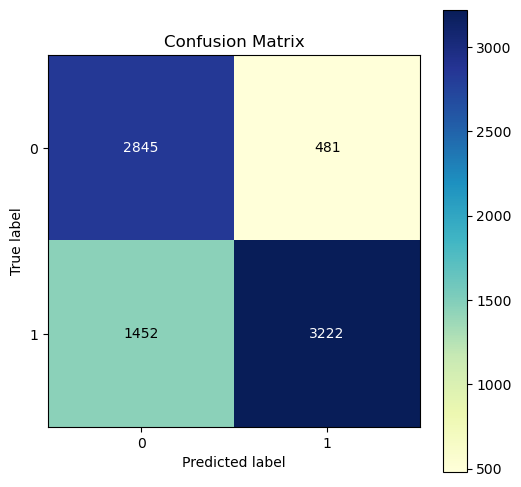

In [63]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))


